# Thinking probabilistically-- Discrete variables

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.

In [1]:
from IPython.display import HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Probabilistic logic and statistical inference

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Probabilistic_logic_and_statistical_inference.mp4" type="video/mp4">
</video>

### What is the goal of statistical inference?
Why do we do statistical inference?

- [ ] To draw probabilistic conclusions about what we might expect if we collected the same data again.
- [ ] To draw actionable conclusions from data.
- [ ] To draw more general conclusions from relatively few data or observations.
- [x] All of these.

[Statistical inference][1] involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

[1]: https://www.quora.com/What-is-statistical-inference

### Why do we use the language of probability?
Which of the following is **not** a reason why we use probabilistic language in statistical inference?

- [ ] Probability provides a measure of uncertainty.
- [x] Probabilistic language is not very precise.
- [ ] Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

## Random number generators and hacker statistics

In [3]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Random_number_generators_and_hacker_statistics.mp4" type="video/mp4">
</video>

### Hacker statistics
- Uses simulated repeated measurements to compute probabilities.

### The np.random module
- Suite of functions based on random number generation
- np.random.random()
    draw a number between 0 and 1
- Suite of functions based on *random number generation*
- np.random.random():
    draw a number between 0 and 1    

### Bernoulli trial
- An experiment that has two options, "success" (True) and "failure" (False).

### Random number seed
- Integer fed into random number generating algorithm
- Manually seed random number generator if you need reproducibility
- Specified using `np.random.seed()`

### Hacker stats probabilities
- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials with the outcome of interest

### Generating random numbers using the np.random module
We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a `for` loop: in this exercise, however, you will write a `for` loop to experience hacker statistics as the practice of repeating an experiment over and over again.

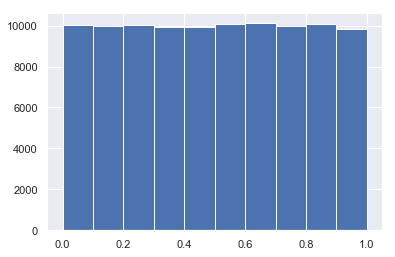

In [4]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, **indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.**

### The np.random module and [Bernoulli trials (Binomial trail)][1]
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability `p` of landing heads (success) and probability `1−p` of landing tails (failure). In this exercise, you will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

[1]: https://en.wikipedia.org/wiki/Bernoulli_trial

In [5]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

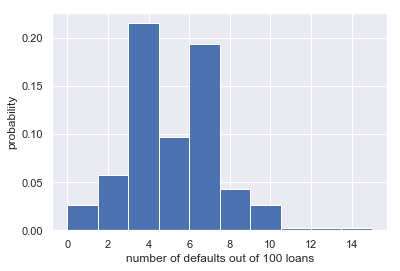

In [6]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. We will revisit this in forthcoming exercises.

### Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as `n_defaults`, as a CDF. The `ecdf()` function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

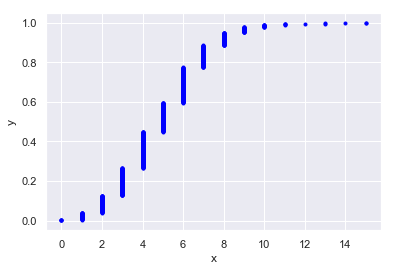

Probability of losing money = 0.022


In [8]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', color='blue', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

## Probability distributions and stories: The Binomial distribution 

In [9]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-Probability_distributions_and_stories_The_Binomial_distribution.mp4" type="video/mp4">
</video>

## Probability mass function (PMF)
- The set of probabilities of discrete outcomes

## Discrete Uniform PMF

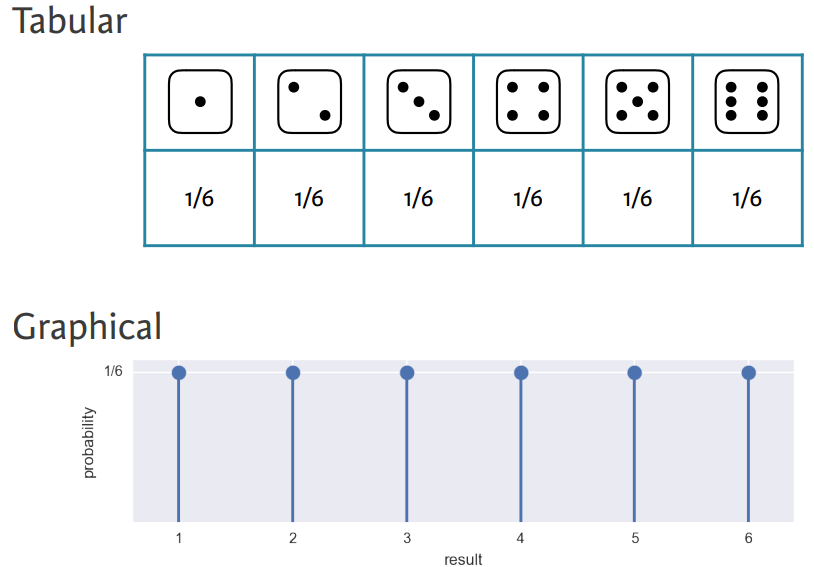

## Probability distribution
- A mathematical description of outcomes

## Discrete Uniform distribution: the story
- The outcome of rolling a single fair die is Discrete Uniformly distributed.

## Binomial distribution: the story
- The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed
- The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

### Sampling out of the [Binomial distribution][1]
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the [Binomial distribution][2].

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with `np.random.seed(42)`) to save you typing that each time.

[1]: https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/binomial-random-variables/v/binomial-distribution
[2]: https://en.wikipedia.org/wiki/Binomial_distribution

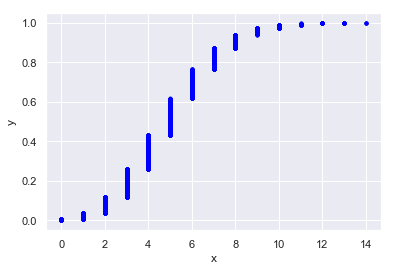

In [10]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100,p=0.05,size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', color='blue', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

### Plotting the Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting `0.5` from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

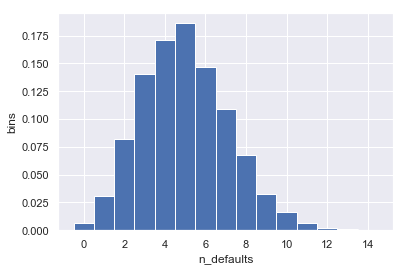

In [11]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('n_defaults')
_ = plt.ylabel('bins')

# Show the plot
plt.show()

## Poisson processes and the [Poisson distribution][1]
[1]: https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

In [12]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/04-Poisson_processes_and_the_Poisson_distribution.mp4" type="video/mp4">
</video>

## Poisson process
- The timing of the next event is completely independent of when the previous event happened

## Examples of Poisson processes
- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

## Poisson distribution
- The number r of arrivals of a Poisson process in a given time interval with average rate of λ arrivals per interval is Poisson distributed.
- The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.
- Limit of the Binomial distribution for low probability of success and large number of trials.
- That is, for rare events.

### Relationship between Binomial and Poisson distributions
**You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events**. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of `0.1`. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to `np` approximates a Binomial distribution for `n` Bernoulli trials with probability `p` of success (with `n` large and `p` small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of `10`. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters `n` and `p` such that `np=10`.

In [13]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability `p` gets lower and lower.

## How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at [retrosheet.org][1] ([license][2]).

![][no_hitter]

[no_hitter]: _Docs/no_hitters.PNG
[1]: http://www.retrosheet.org/
[2]: http://www.retrosheet.org/notice.txt

> Possible Answers
- [ ] Discrete uniform
- [ ] Binomial
- [ ] Poisson
- [x] Both Binomial and Poisson, though Poisson is easier to model and compute.
- [ ] Both Binomial and Poisson, though Binomial is easier to model and compute.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, **in our case the mean number of no-hitters per season.**

### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [14]:
251/115

2.1826086956521737

In [15]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115,10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.